In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yahooFinance

In [ ]:
pip install yfinance


In [ ]:
TSLA = yahooFinance.Ticker("TSLA")

In [ ]:
info = TSLA.info
print(info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [ ]:
df = TSLA.history(period="10y")

In [ ]:
df.shape


(2518, 7)

In [ ]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-03-28 00:00:00-04:00,14.186667,14.448000,14.018000,14.158000,145272000,0.0,0.0
2014-03-31 00:00:00-04:00,14.433333,14.450000,13.759333,13.896667,125700000,0.0,0.0
2014-04-01 00:00:00-04:00,13.934667,14.544000,13.905333,14.464667,110571000,0.0,0.0
2014-04-02 00:00:00-04:00,14.666667,15.392667,14.536667,15.352667,161734500,0.0,0.0
2014-04-03 00:00:00-04:00,15.353333,15.715333,14.800000,15.026667,163855500,0.0,0.0


In [ ]:
df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-22 00:00:00-04:00,166.690002,171.199997,166.300003,170.830002,75454700,0.0,0.0
2024-03-25 00:00:00-04:00,168.759995,175.240005,168.729996,172.630005,74228600,0.0,0.0
2024-03-26 00:00:00-04:00,178.580002,184.250000,177.380005,177.669998,113186200,0.0,0.0
2024-03-27 00:00:00-04:00,181.410004,181.910004,176.000000,179.830002,81804000,0.0,0.0
2024-03-28 00:00:00-04:00,177.459000,179.570007,175.699997,176.110001,63903331,0.0,0.0


# Preprocessing the Dataset

In [ ]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
df.duplicated()

Date
2014-03-28 00:00:00-04:00    False
2014-03-31 00:00:00-04:00    False
2014-04-01 00:00:00-04:00    False
2014-04-02 00:00:00-04:00    False
2014-04-03 00:00:00-04:00    False
                             ...  
2024-03-22 00:00:00-04:00    False
2024-03-25 00:00:00-04:00    False
2024-03-26 00:00:00-04:00    False
2024-03-27 00:00:00-04:00    False
2024-03-28 00:00:00-04:00    False
Length: 2518, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-03-28 00:00:00-04:00 to 2024-03-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Volume        2518 non-null   int64  
 5   Dividends     2518 non-null   float64
 6   Stock Splits  2518 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.4 KB


# Tesla Stock over the last decade

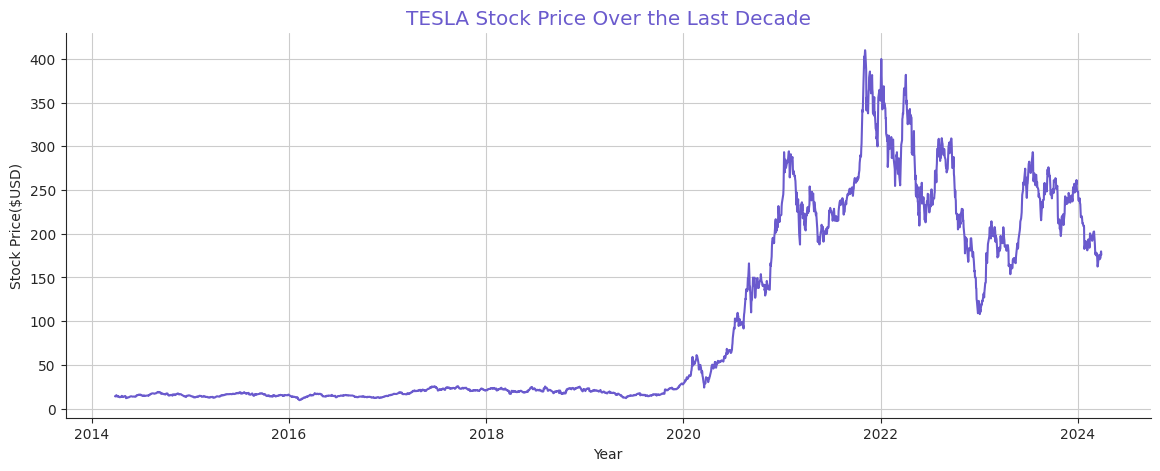

In [ ]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df, x = 'Date', y= 'Close', color = 'slateblue')
sns.despine()
plt.title("TESLA Stock Price Over the Last Decade", size = 'x-large', color = 'slateblue')
plt.xlabel("Year")
plt.ylabel("Stock Price($USD)")
plt.grid(True)

# Tesla Stock during and after Covid

[*********************100%%**********************]  1 of 1 completed


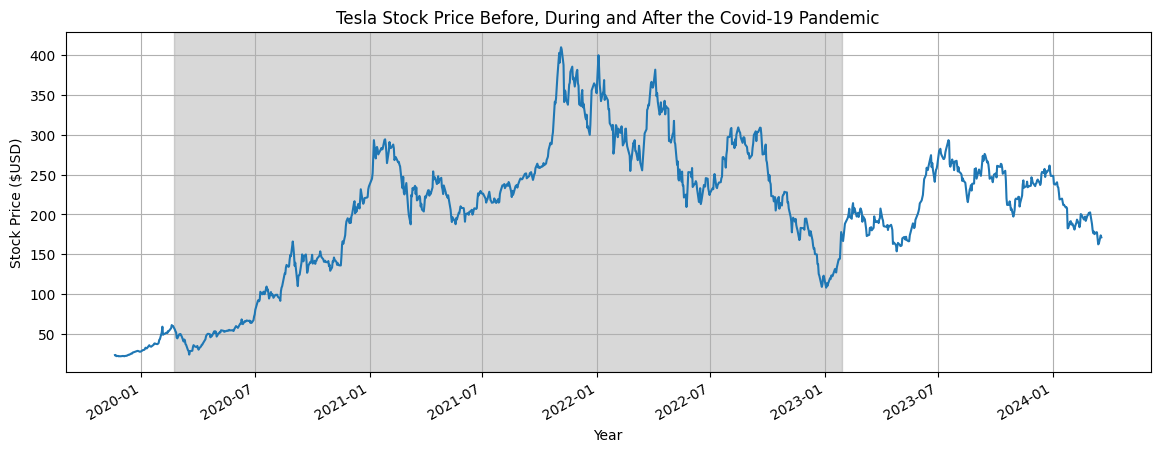

In [ ]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data from Yahoo Finance
tsla = yf.Ticker("TSLA")

def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end, color):

    stock_data = yf.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14, 5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for COVID19 pandemic period)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"Tesla Stock Price Before, During and After the Covid-19 Pandemic")
    plt.xlabel("Year")
    plt.ylabel("Stock Price ($USD)")
    plt.grid(True)
    plt.show()

color = 'slateblue'
ticker_symbol = 'TSLA'
start_date = '2019-11-20'
end_date = '2024-03-20'
shaded_start = '2020-02-23'
shaded_end = '2023-01-28'

plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end, color)

# Tesla Stock in Candlestick chart

In [ ]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-03-31')

# Create a candlestick chart of the stock price
candlestick_chart = go.Figure(data=[go.Candlestick(x=tesla_data.index,
                                                  open=tesla_data['Open'],
                                                  high=tesla_data['High'],
                                                  low=tesla_data['Low'],
                                                  close=tesla_data['Close'])])
candlestick_chart.show()

[*********************100%%**********************]  1 of 1 completed


# Tesla Stock for 1 month after Model Y was released


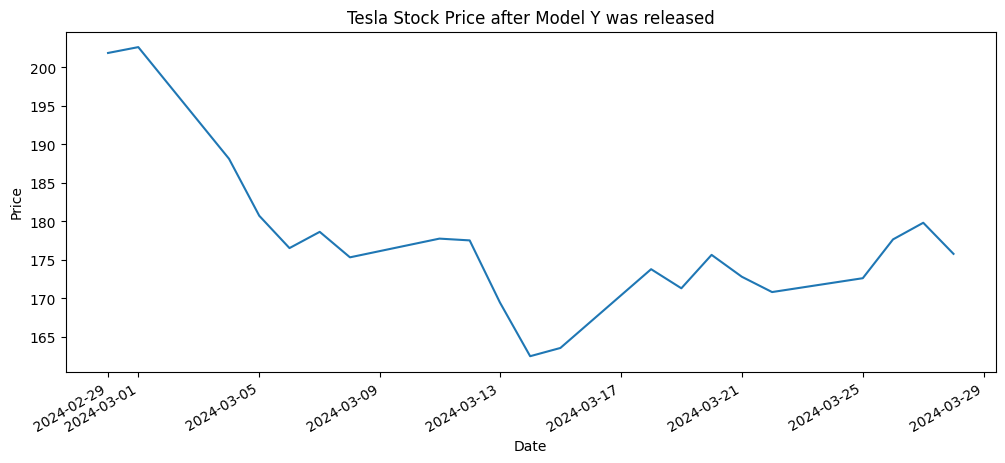

In [ ]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data from Yahoo Finance
tsla = yf.Ticker("TSLA")

# Get the historical market data after Model Y was released
df = tsla.history(period="1mo")
df = df[df.index >= '2020-03-15']

# Plot the closing stock price
df['Close'].plot(figsize=(12,5))
plt.title('Tesla Stock Price after Model Y was released')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()